Demographic Variables: age, gender, race, marital status and education level

Cognitive Tests: MMSE (Mini-Mental State Examination) CDRSB (Clinical Dementia Rating Sum of Boxes) ADAS (Alzheimer’s Disease Assessment Scale–Cognitive subscale) RAVLT (Rey Auditory Verbal Learning Test): neurophysiological tests evaluating an individual's episodic memory MOCA (Montreal Cognitive Assessment)

Brain-Related Variables: Hippocampus, Ventricles, WholeBrain, Entorhinal, Fusiform and MidTemp

Important Biomarkers: A-beta (Amyloid Beta), Tau, APOE4 and FDG (important proteins or biomarkers that are associated with Alzheimer’s disease or Mild Cognitive Impairment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adnimerge = pd.read_csv('adnimerge.csv')
print(adnimerge.shape)

(14740, 114)


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lists = ['PTID','AGE','PTGENDER','PTEDUCAT','PTRACCAT','PTMARRY',
            'CDRSB','ADAS11','ADAS13','MMSE','RAVLT.learning','RAVLT.forgetting','FAQ','MOCA.bl',
             'mPACCdigit.bl','mPACCtrailsB.bl','EcogPtTotal','EcogSPTotal',
            'APOE4','ABETA','ABETA.bl','TAU','TAU.bl','PTAU','PTAU.bl',
            'FDG','AV45',
            'Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','MidTemp.bl','DX'
           ]

In [4]:
df = adnimerge[lists]

In [5]:
# get rid of those duplicated rows
df.drop_duplicates(subset ="PTID", keep = 'first', inplace = True) 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df['DX'].replace('Dementia','AD',inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
df.shape

(2269, 32)

Statistical Analysis

In [8]:
adnidf = df.dropna()

In [9]:
adnidf.shape, df.shape

((628, 32), (2269, 32))

In [10]:
adnidf.dtypes

PTID                 object
AGE                 float64
PTGENDER             object
PTEDUCAT              int64
PTRACCAT             object
PTMARRY              object
CDRSB               float64
ADAS11              float64
ADAS13              float64
MMSE                float64
RAVLT.learning      float64
RAVLT.forgetting    float64
FAQ                 float64
MOCA.bl             float64
mPACCdigit.bl       float64
mPACCtrailsB.bl     float64
EcogPtTotal         float64
EcogSPTotal         float64
APOE4               float64
ABETA                object
ABETA.bl             object
TAU                  object
TAU.bl               object
PTAU                 object
PTAU.bl              object
FDG                 float64
AV45                float64
Hippocampus.bl      float64
WholeBrain.bl       float64
Entorhinal.bl       float64
MidTemp.bl          float64
DX                   object
dtype: object

In [11]:
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Primary Biomarkers

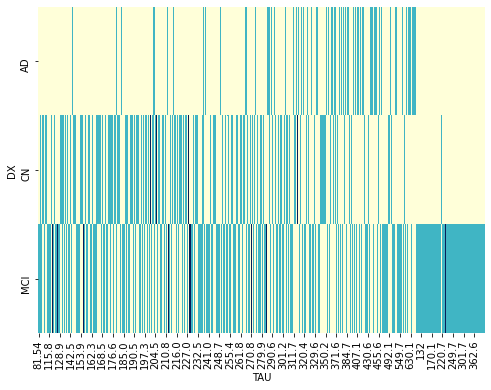

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(adnidf['DX'], adnidf['TAU']),cmap="YlGnBu",cbar=False);

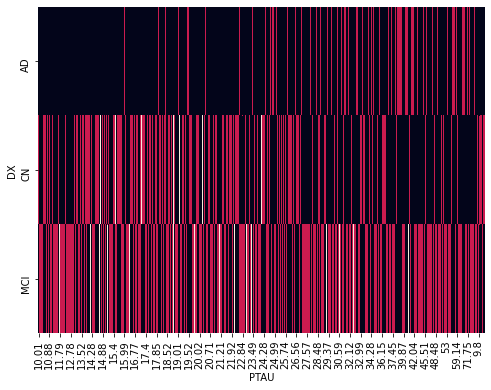

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(adnidf['DX'], adnidf['PTAU']),cbar=False);

Primary Risk Factors

APOE ε4 is called a risk-factor gene because it increases a person's risk of developing the disease. Having one or two APOE ε4 alleles increases the risk of developing Alzheimer's. About 25 percent of people carry one copy of APOE ɛ4, and 2 to 3 percent carry two copies.

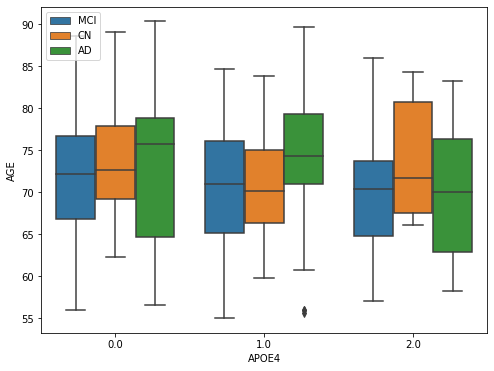

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='APOE4',y='AGE', hue='DX', data=adnidf)
plt.legend(loc=2);

Demographic Info

In [15]:
df_basic = adnidf[['AGE','PTGENDER','PTEDUCAT','PTRACCAT','PTMARRY','DX']]
df_basic.shape

(628, 6)

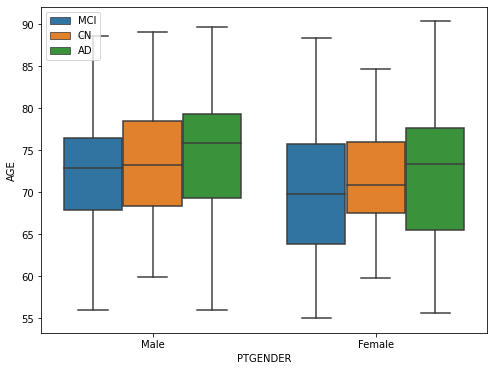

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PTGENDER',y='AGE', hue='DX', data=adnidf)
plt.legend(loc=2);

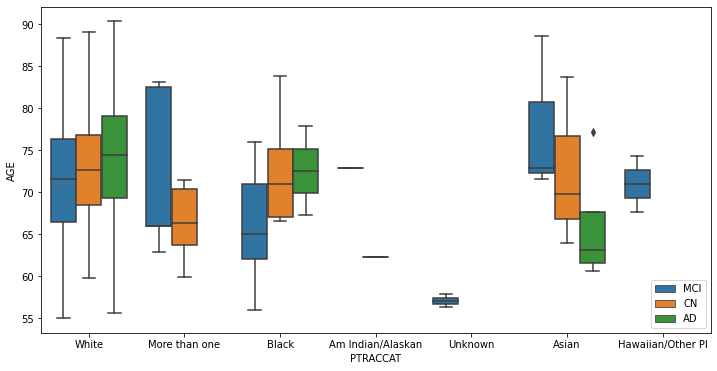

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='PTRACCAT',y='AGE', hue='DX', data=adnidf)
plt.legend(loc=4);

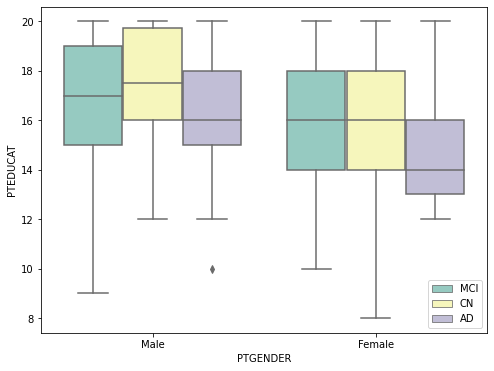

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PTGENDER',y='PTEDUCAT', hue='DX', palette='Set3',data=adnidf)
plt.legend(loc=4);

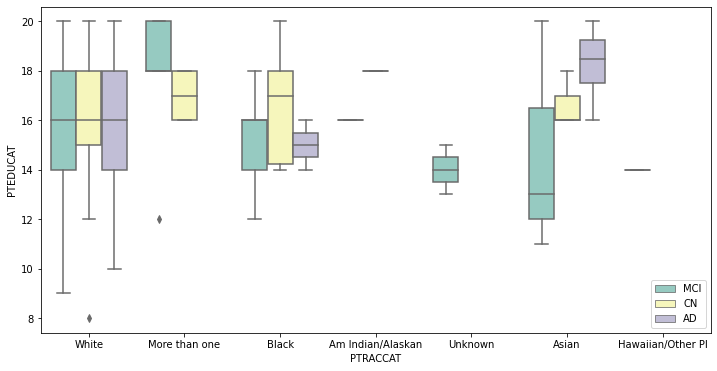

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='PTRACCAT',y='PTEDUCAT', hue='DX', palette='Set3',data=adnidf)
plt.legend(loc=4);

Primary MRI Measures
(Hippocampus volume, WholeBrain volume, Entorhinal and MidTemp)

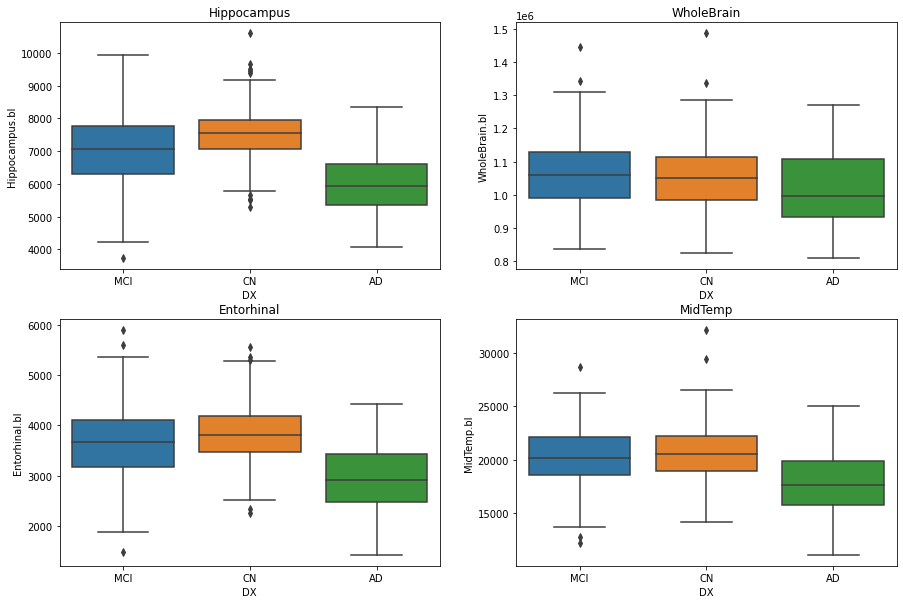

In [20]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
axes[0,0].set_title('Hippocampus')
sns.boxplot(x='DX',y='Hippocampus.bl',data=adnidf, ax=axes[0,0])
axes[0,1].set_title('WholeBrain')
sns.boxplot(x='DX',y='WholeBrain.bl',data=adnidf, ax=axes[0,1])
axes[1,0].set_title('Entorhinal')
sns.boxplot(x='DX',y='Entorhinal.bl',data=adnidf, ax=axes[1,0])
axes[1,1].set_title('MidTemp')
sns.boxplot(x='DX',y='MidTemp.bl',data=adnidf, ax=axes[1,1]);

Cognitive Test Result

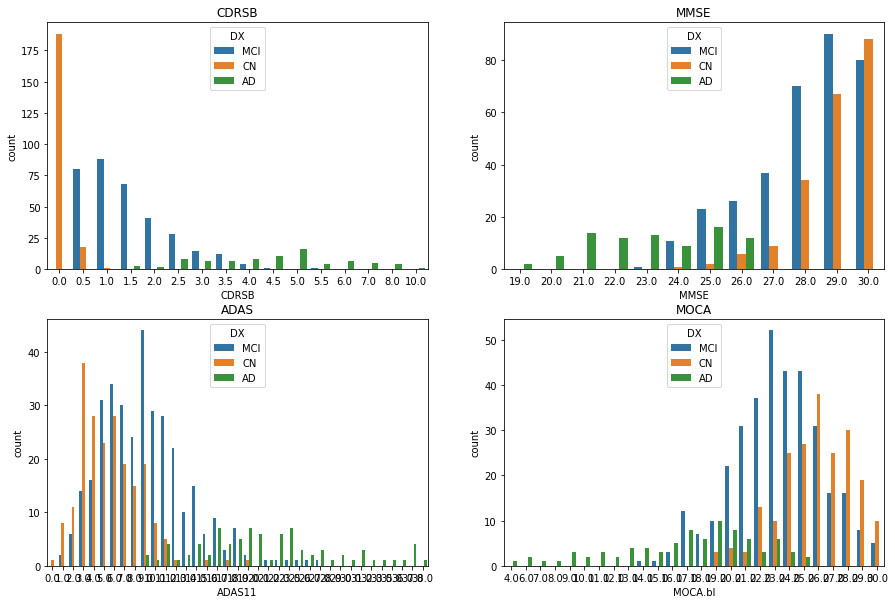

In [21]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
axes[0,0].set_title('CDRSB')
sns.countplot(x='CDRSB',hue='DX',data=adnidf,ax=axes[0,0])
axes[0,1].set_title('MMSE')
sns.countplot(x='MMSE',hue='DX',data=adnidf,ax=axes[0,1])
axes[1,0].set_title('ADAS')
sns.countplot(x='ADAS11',hue='DX',data=adnidf,ax=axes[1,0])
axes[1,1].set_title('MOCA')
sns.countplot(x='MOCA.bl',hue='DX',data=adnidf,ax=axes[1,1]);

ANOVA
Null hypotheses: Groups means are equal (no variation in means of groups)
Alternative hypotheses: At least, one group mean is different from other groups

Our P-value is smaller than 0.05, so we should reject our null hypothesis. We conclude that 'years of education' affects the outcome. 

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
model_edu = ols('PTEDUCAT ~ DX', data=adnidf).fit()
anova_table = sm.stats.anova_lm(model_edu)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
DX,2.0,48.339499,24.169750,3.661108,0.026257
Residual,625.0,4126.098399,6.601757,NaN,NaN


In [24]:
model_age = ols('AGE ~ DX', data=adnidf).fit()
anova_table = sm.stats.anova_lm(model_age, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
DX,2.0,443.277611,221.638806,4.564953,0.01076
Residual,625.0,30345.164682,48.552263,NaN,NaN


In [25]:
model_APOE = ols('APOE4 ~ DX', data=adnidf).fit()
anova_table = sm.stats.anova_lm(model_APOE, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
DX,2.0,22.906496,11.453248,28.060872,2.136844e-12
Residual,625.0,255.098281,0.408157,NaN,NaN


In [26]:
model_MMSE = ols('MMSE ~ DX', data=adnidf).fit()
anova_table = sm.stats.anova_lm(model_MMSE, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
DX,2.0,2126.009958,1063.004979,429.72688,3.962048e-118
Residual,625.0,1546.047367,2.473676,NaN,NaN


Predictive Modeling

In [27]:
# build up a data subset with 'CN' and 'AD'
cond1 = (df['DX']=='CN') | (df['DX']=='AD')
df_CA = df[cond1]
df_CA.shape

(1219, 32)

In [28]:
df_CA.isnull().sum()

PTID                  0
AGE                   1
PTGENDER              0
PTEDUCAT              0
PTRACCAT              0
PTMARRY               0
CDRSB                 0
ADAS11                4
ADAS13               12
MMSE                  0
RAVLT.learning        7
RAVLT.forgetting      7
FAQ                   7
MOCA.bl             441
mPACCdigit.bl         0
mPACCtrailsB.bl       0
EcogPtTotal         428
EcogSPTotal         435
APOE4                56
ABETA               621
ABETA.bl            621
TAU                 621
TAU.bl              621
PTAU                621
PTAU.bl             621
FDG                 535
AV45                647
Hippocampus.bl      469
WholeBrain.bl       383
Entorhinal.bl       492
MidTemp.bl          492
DX                    0
dtype: int64

In [29]:
# build up a data subset with 'CN' and 'MCI'
cond2 = (df['DX']=='CN') | (df['DX']=='MCI')
df_CM = df[cond2]
df_CM.shape

(1847, 32)

In [30]:
# build up a data subset with 'MCI' and 'AD'
cond3 = (df['DX']=='MCI') | (df['DX']=='AD')
df_MA = df[cond3]
df_MA.shape

(1428, 32)

In [31]:
df_CA['label_CA'] = pd.Series(np.where(df_CA['DX'].values == 'CN', 0, 1),
          df_CA.index)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_CA['label_CA'].value_counts()

0    819
1    400
Name: label_CA, dtype: int64

In [33]:
df_CM['label_CM'] = pd.Series(np.where(df_CM['DX'].values == 'CN', 0, 1),
          df_CM.index)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_CM['label_CM'].value_counts()

1    1028
0     819
Name: label_CM, dtype: int64

In [35]:
df_MA['label_MA'] = pd.Series(np.where(df_MA['DX'].values == 'MCI', 0, 1),
          df_MA.index)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_MA['label_MA'].value_counts()

0    1028
1     400
Name: label_MA, dtype: int64

In [37]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Applications/anaconda3/lib/python3.7/site-packages (0.23.1)


In [38]:
! pip install missingpy

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from missingpy import KNNImputer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Data subset with 'CN' and 'AD'

In [40]:
train, test = train_test_split(df_CA, train_size=0.9, test_size=0.1, stratify=df_CA['label_CA'], random_state=42)

In [41]:
target = 'label_CA'
features_CA = ['AGE','PTGENDER','PTEDUCAT','PTRACCAT','PTMARRY','APOE4','ABETA','TAU','PTAU',
            'Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','MidTemp.bl']
X_train = train[features_CA]
y_train = train[target]
X_test = test[features_CA]
y_test = test[target]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1097, 13), (1097,), (122, 13), (122,))

In [42]:
X_train.dtypes

AGE               float64
PTGENDER           object
PTEDUCAT            int64
PTRACCAT           object
PTMARRY            object
APOE4             float64
ABETA              object
TAU                object
PTAU               object
Hippocampus.bl    float64
WholeBrain.bl     float64
Entorhinal.bl     float64
MidTemp.bl        float64
dtype: object

In [43]:
#Identify the baseline
majority_class = df_CA[target].mode()
majority_class

0    0
dtype: int64

In [44]:
df_CA_bl = [majority_class] * len(df_CA[target])
accuracy_score(df_CA[target], df_CA_bl)

0.671862182116489

So if we are doing nothing, just guess that the result is '0'(CN), then our accuracy rate is 67%. 

In [45]:
pipeline_DT = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state = 42)
)
k=5
scores_dt = cross_val_score(pipeline_DT, X_train, y_train, cv=k,
                         scoring = 'accuracy')

In [46]:
pipeline_RF = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100,random_state=42)
)
k=5
scores_rf = cross_val_score(pipeline_RF, X_train, y_train, cv=k,scoring = 'accuracy')

In [94]:
pipeline_XG = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.5)
)
k=5
scores_xg = cross_val_score(pipeline_XG, X_train, y_train, cv=k,scoring = 'accuracy')

In [95]:
print(f'Decision Tree model accuracy score for {k} folds: ', scores_dt)
print(f'Random Forest model accuracy score for {k} folds: ', scores_rf)
print(f'XGBoost model accuracy score for {k} folds: ', scores_xg)

Decision Tree model accuracy score for 5 folds:  [0.75       0.73636364 0.71689498 0.77625571 0.78538813]
Random Forest model accuracy score for 5 folds:  [0.67867868 0.72372372 0.6686747  0.72590361 0.67168675]
XGBoost model accuracy score for 5 folds:  [0.81363636 0.78181818 0.78082192 0.85388128 0.83561644]


In [96]:
print(scores_dt.mean(),scores_rf.mean(),scores_xg.mean())

0.7529804898298048 0.6937334925286732 0.8131548360315485


In [50]:
# check model hyperparameters
print('Model Hyperparameters:')
print(pipeline_RF.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(random_state=42)


In [51]:
from scipy.stats import randint, uniform
param_distributions = {
    'randomforestclassifier__bootstrap': ['Ture','False'],
    'randomforestclassifier__n_estimators': [50,100,150,200],
    'randomforestclassifier__min_samples_leaf': [1,2,4],
    'randomforestclassifier__max_features': ['auto','sqrt'],
    'randomforestclassifier__min_samples_split':[2,5,10]
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline_RF,
    param_distributions=param_distributions,
    n_iter=7,
    cv=5,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    #n_jobs=-1

)

search.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.960, test=0.818), total=   0.4s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.968, test=0.814), total=   0.4s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.959, test=0.795), total=   0.6s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.964, test=0.858), total=   0.4s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.968, test=0.863), total=   0.4s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture, score=(train=1.000, test=0.809), total=   0.3s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture, score=(train=1.000, test=0.791), total=   0.3s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.9s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture, score=(train=1.000, test=0.808), total=   0.3s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.3s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture, score=(train=1.000, test=0.881), total=   0.3s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.6s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__bootstrap=Ture, score=(train=1.000, test=0.858), total=   0.3s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 
[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture, score=(train=0.944, test=0.814), total=   0.4s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=Ture 
[CV]  randomforestclassif

[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=False, score=(train=1.000, test=0.795), total=   0.3s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=False 
[CV]  randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=False, score=(train=1.000, test=0.804), total=   0.3s
[CV] randomforestclassifier__n_estimators=150, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=auto, randomforestclassifier__bootstrap=False 
[CV]  randomforestclassi

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   13.5s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=7,
                   param_distributions={'randomforestclassifier__bootstrap': ['Ture',
                                                                              'False'],
                                        'randomforestclassifier__max_features': ['auto',
                                                                                 'sqrt'],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                             

In [53]:
print('Best hyperparameters',search.best_params_)
print('Cross_validation accuracy', search.best_score_)

Best hyperparameters {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__bootstrap': 'Ture'}
Cross_validation accuracy 0.8322955583229555


In [54]:
pipeline_RF = search.best_estimator_

In [97]:
y_pred = pipeline_RF.predict(X_test)
print('Accuracy score of test set is:',accuracy_score(y_test, y_pred))

Accuracy score of test set is: 0.8852459016393442


In [98]:
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred)}')

Confusion Matrix of test set: 
 [[79  3]
 [11 29]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        82
           1       0.91      0.72      0.81        40

    accuracy                           0.89       122
   macro avg       0.89      0.84      0.86       122
weighted avg       0.89      0.89      0.88       122



In [57]:
pipeline_RF.predict_proba(X_test)

array([[0.98422679, 0.01577321],
       [0.72866667, 0.27133333],
       [0.67604335, 0.32395665],
       [0.93166667, 0.06833333],
       [0.93854635, 0.06145365],
       [0.30703104, 0.69296896],
       [0.95261472, 0.04738528],
       [0.94880952, 0.05119048],
       [0.9840758 , 0.0159242 ],
       [0.9387381 , 0.0612619 ],
       [0.91329855, 0.08670145],
       [0.91896992, 0.08103008],
       [0.92034627, 0.07965373],
       [0.97458333, 0.02541667],
       [0.20260653, 0.79739347],
       [0.99449146, 0.00550854],
       [0.96994228, 0.03005772],
       [0.77725397, 0.22274603],
       [0.99504292, 0.00495708],
       [0.24429062, 0.75570938],
       [0.79108141, 0.20891859],
       [0.80484541, 0.19515459],
       [0.94616855, 0.05383145],
       [0.54645591, 0.45354409],
       [0.995     , 0.005     ],
       [0.9082963 , 0.0917037 ],
       [0.80944482, 0.19055518],
       [0.48274046, 0.51725954],
       [0.4524127 , 0.5475873 ],
       [0.07421429, 0.92578571],
       [0.

In [58]:
y_pred_proba = pipeline_RF.predict_proba(X_test)[:,1]

In [59]:
roc_auc_score(y_test, y_pred_proba)

0.9457317073170732

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [61]:
pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold':thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000,1.969167
1,0.000000,0.025,0.969167
2,0.000000,0.225,0.872917
3,0.012195,0.225,0.865778
4,0.012195,0.600,0.605209
5,0.024390,0.600,0.570636
6,0.024390,0.725,0.523754
7,0.036585,0.725,0.517260
8,0.036585,0.750,0.453544
9,0.060976,0.750,0.440536


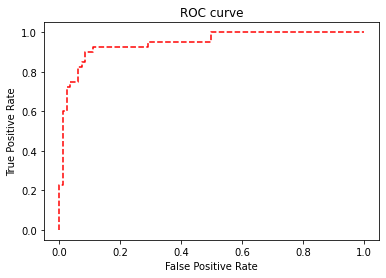

In [62]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linestyle='--',color='r')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

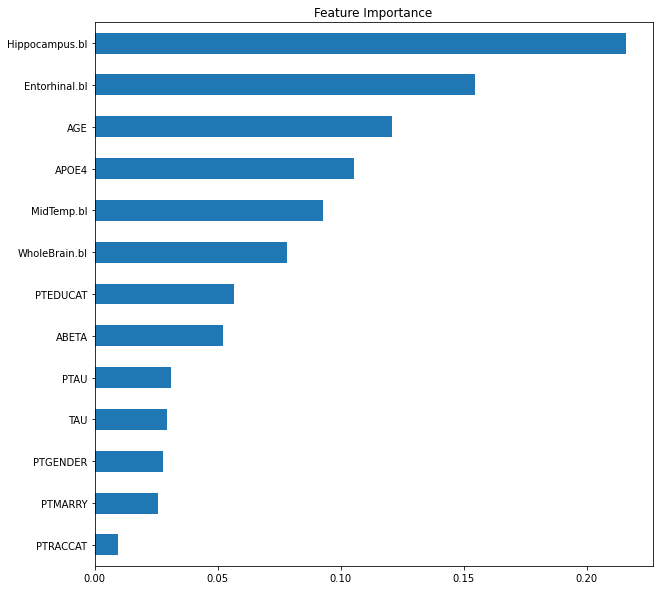

In [63]:
model_rf = pipeline_RF.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_test.columns)
plt.figure(figsize=(10, 10))
plt.title('Feature Importance')
importances.sort_values().plot.barh();

In [64]:
# Get numerical feature importances
importances = list(model_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_test.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Hippocampus.bl       Importance: 0.22
Variable: Entorhinal.bl        Importance: 0.15
Variable: AGE                  Importance: 0.12
Variable: APOE4                Importance: 0.11
Variable: MidTemp.bl           Importance: 0.09
Variable: WholeBrain.bl        Importance: 0.08
Variable: PTEDUCAT             Importance: 0.06
Variable: ABETA                Importance: 0.05
Variable: PTGENDER             Importance: 0.03
Variable: PTMARRY              Importance: 0.03
Variable: TAU                  Importance: 0.03
Variable: PTAU                 Importance: 0.03
Variable: PTRACCAT             Importance: 0.01


Data subset with 'CN' and 'MCI'

In [67]:
train_CM, test_CM = train_test_split(df_CM, train_size=0.9, test_size=0.1, stratify=df_CM['label_CM'], random_state=42)

In [69]:
target_CM = 'label_CM'
features_CM = ['AGE','PTGENDER','PTEDUCAT','PTRACCAT','PTMARRY','APOE4','ABETA','TAU','PTAU',
            'Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','MidTemp.bl']
X_train_CM = train_CM[features_CM]
y_train_CM = train_CM[target_CM]
X_test_CM = test_CM[features_CM]
y_test_CM = test_CM[target_CM]
X_train_CM.shape, y_train_CM.shape, X_test_CM.shape, y_test_CM.shape

((1662, 13), (1662,), (185, 13), (185,))

In [73]:
#Identify the baseline
majority_class_CM = df_CM[target_CM].mode()
majority_class_CM

0    1
dtype: int64

In [75]:
df_CM_bl = [majority_class_CM] * len(df_CM[target_CM])
accuracy_score(df_CM[target_CM], df_CM_bl)

0.5565782349756362

In [80]:
pipeline_RF_CM = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100,random_state=42)
)
k=5
scores_rf_cm = cross_val_score(pipeline_RF_CM, X_train_CM, y_train_CM, cv=k,scoring = 'accuracy')

In [81]:
pipeline_XG_CM = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.5)
)
k=5
scores_xg_cm = cross_val_score(pipeline_XG_CM, X_train_CM, y_train_CM, cv=k,scoring = 'accuracy')

In [82]:
print(f'Random Forest model accuracy score for {k} folds: ', scores_rf_cm)
print(f'XGBoost model accuracy score for {k} folds: ', scores_xg_cm)

Random Forest model accuracy score for 5 folds:  [0.67867868 0.72372372 0.6686747  0.72590361 0.67168675]
XGBoost model accuracy score for 5 folds:  [0.60960961 0.67267267 0.65361446 0.67771084 0.64457831]


In [86]:
print(scores_rf_cm.mean(),scores_xg_cm.mean())

0.6937334925286732 0.6516371793480228


According to accuracy score, random forest is superior. So I will use random forest model to do the following. 

In [89]:
pipeline_RF_CM.fit(X_train_CM, y_train_CM)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['PTGENDER', 'PTRACCAT', 'PTMARRY',
                                      'ABETA', 'TAU', 'PTAU'],
                                mapping=[{'col': 'PTGENDER',
                                          'data_type': dtype('O'),
                                          'mapping': Female    1
Male      2
NaN      -2
dtype: int64},
                                         {'col': 'PTRACCAT',
                                          'data_type': dtype('O'),
                                          'mapping': White                1
Asian                2
Black                3
Unknown              4
More than one        5
Am Indian/Alaskan    6
Hawaiian/Other PI    7
NaN                 -2
dtype: int64},
                                         {'col': 'PT...
                                         {'col': 'TAU', 'data_type': dtype('O'),
                                          'mapping': 188.4      1
217.4      2
2

In [90]:
y_pred_cm = pipeline_RF_CM.predict(X_test_CM)
print('Accuracy score of test set is:',accuracy_score(y_test_CM, y_pred_cm))

Accuracy score of test set is: 0.7189189189189189


In [100]:
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test_CM, y_pred_cm)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test_CM, y_pred_cm)}')

Confusion Matrix of test set: 
 [[58 24]
 [28 75]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        82
           1       0.76      0.73      0.74       103

    accuracy                           0.72       185
   macro avg       0.72      0.72      0.72       185
weighted avg       0.72      0.72      0.72       185



In [102]:
pipeline_RF_CM.predict_proba(X_test_CM)

array([[0.31      , 0.69      ],
       [0.62      , 0.38      ],
       [0.71      , 0.29      ],
       [0.38      , 0.62      ],
       [0.22      , 0.78      ],
       [0.56      , 0.44      ],
       [0.26      , 0.74      ],
       [0.63      , 0.37      ],
       [0.42      , 0.58      ],
       [0.29      , 0.71      ],
       [0.32      , 0.68      ],
       [0.31      , 0.69      ],
       [0.59      , 0.41      ],
       [0.34      , 0.66      ],
       [0.53      , 0.47      ],
       [0.42      , 0.58      ],
       [0.54      , 0.46      ],
       [0.62      , 0.38      ],
       [0.26      , 0.74      ],
       [0.11      , 0.89      ],
       [0.15      , 0.85      ],
       [0.32      , 0.68      ],
       [0.34      , 0.66      ],
       [0.25      , 0.75      ],
       [0.69      , 0.31      ],
       [0.16      , 0.84      ],
       [0.18      , 0.82      ],
       [0.33      , 0.67      ],
       [0.2       , 0.8       ],
       [0.21      , 0.79      ],
       [0.

In [104]:
y_pred_proba_CM = pipeline_RF_CM.predict_proba(X_test_CM)[:,1]

In [106]:
roc_auc_score(y_test_CM, y_pred_proba_CM)

0.7528415818138764

Data subset with 'MCI' and 'AD'

In [71]:
train_MA, test_MA = train_test_split(df_MA, train_size=0.9, test_size=0.1, stratify=df_MA['label_MA'], random_state=42)

In [72]:
target_MA = 'label_MA'
features_MA = ['AGE','PTGENDER','PTEDUCAT','PTRACCAT','PTMARRY','APOE4','ABETA','TAU','PTAU',
            'Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','MidTemp.bl']
X_train_MA = train_MA[features_MA]
y_train_MA = train_MA[target_MA]
X_test_MA = test_MA[features_MA]
y_test_MA = test_MA[target_MA]
X_train_MA.shape, y_train_MA.shape, X_test_MA.shape, y_test_MA.shape

((1285, 13), (1285,), (143, 13), (143,))

In [74]:
#Identify the baseline
majority_class_MA = df_MA[target_MA].mode()
majority_class_MA

0    0
dtype: int64

In [76]:
df_MA_bl = [majority_class_MA] * len(df_MA[target_MA])
accuracy_score(df_MA[target_MA], df_MA_bl)

0.7198879551820728

In [83]:
pipeline_RF_MA = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100,random_state=42)
)
k=5
scores_rf_ma = cross_val_score(pipeline_RF_MA, X_train_MA, y_train_MA, cv=k,scoring = 'accuracy')

In [84]:
pipeline_XG_MA = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.5)
)
k=5
scores_xg_ma = cross_val_score(pipeline_XG_MA, X_train_MA, y_train_MA, cv=k,scoring = 'accuracy')

In [85]:
print(f'Random Forest model accuracy score for {k} folds: ', scores_rf_ma)
print(f'XGBoost model accuracy score for {k} folds: ', scores_xg_ma)

Random Forest model accuracy score for 5 folds:  [0.71206226 0.73929961 0.76264591 0.71206226 0.71595331]
XGBoost model accuracy score for 5 folds:  [0.70038911 0.73929961 0.71595331 0.69649805 0.68093385]


In [87]:
print(scores_rf_ma.mean(),scores_xg_ma.mean())

0.7284046692607005 0.7066147859922178


In [92]:
pipeline_RF_MA.fit(X_train_MA, y_train_MA)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['PTGENDER', 'PTRACCAT', 'PTMARRY',
                                      'ABETA', 'TAU', 'PTAU'],
                                mapping=[{'col': 'PTGENDER',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'PTRACCAT',
                                          'data_type': dtype('O'),
                                          'mapping': Black                1
White                2
More than one        3
Asian                4
Am Indian/Alaskan    5
Unknown              6
Hawaiian/Other PI    7
NaN                 -2
dtype: int64},
                                         {'col': 'PT...
                                          'mapping': 337.6      1
219.9      2
134.9      3
NaN        4
359.0      5
        ... 
115.4    729
230.6    730
413.

In [93]:
y_pred_MA = pipeline_RF_MA.predict(X_test_MA)
print('Accuracy score of test set is:',accuracy_score(y_test_MA, y_pred_MA))

Accuracy score of test set is: 0.6923076923076923


In [99]:
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test_MA, y_pred_MA)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test_MA, y_pred_MA)}')

Confusion Matrix of test set: 
 [[89 14]
 [30 10]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       103
           1       0.42      0.25      0.31        40

    accuracy                           0.69       143
   macro avg       0.58      0.56      0.56       143
weighted avg       0.66      0.69      0.66       143



In [101]:
pipeline_RF_MA.predict_proba(X_test_MA)

array([[0.67, 0.33],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.48, 0.52],
       [0.7 , 0.3 ],
       [0.69, 0.31],
       [0.75, 0.25],
       [0.77, 0.23],
       [0.91, 0.09],
       [0.44, 0.56],
       [0.33, 0.67],
       [0.77, 0.23],
       [0.8 , 0.2 ],
       [0.22, 0.78],
       [0.94, 0.06],
       [0.64, 0.36],
       [0.43, 0.57],
       [1.  , 0.  ],
       [0.73, 0.27],
       [0.35, 0.65],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.83, 0.17],
       [0.59, 0.41],
       [0.78, 0.22],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.69, 0.31],
       [0.93, 0.07],
       [0.42, 0.58],
       [0.58, 0.42],
       [0.89, 0.11],
       [0.4 , 0.6 ],
       [0.98, 0.02],
       [0.45, 0.55],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.92, 0.08],
       [0.88, 0.12],
       [0.74, 0.26],
       [0.7 , 0.3 ],
       [0.66, 0.34],
       [0.88, 0.12],
       [0.94, 0.06],
       [0.48, 0.52],
       [0.98, 0.02],
       [0.75,

In [103]:
y_pred_proba_MA = pipeline_RF_MA.predict_proba(X_test_MA)[:,1]

In [105]:
roc_auc_score(y_test_MA, y_pred_proba_MA)

0.7173543689320389